In [1]:
import numpy
import math
import matplotlib.pyplot as plt
import sympy

from mpl_toolkits.mplot3d import Axes3D

from sympy import symbols, Matrix, pi, cos, sin, I, acos, sqrt
from sympy import Quaternion
import scipy.optimize as so

import pandas as pd

In [2]:
q1, q2 , q3 ,q4 = symbols('\\theta_1, \\theta_2, \\theta_3 , \\theta_4')
q1

\theta_1

In [3]:
l1 ,l2 , l3, l4 , l5 = symbols('l_1,l_2,l_3,l_4,l_5')
l5

l_5

In [4]:
def Rz(theta):
        Rz = sympy.Matrix([[cos(theta),-sin(theta),0],
                           [sin(theta),cos(theta),0],
                           [0,0,1]])
        return Rz

In [5]:
Rnb = Rz(q1)
Rna = Rz(q2)
Rbc = Rz(q3)
Rbd = Rz(math.pi + q3)
Rae = Rz(q4)
Rbd

Matrix([
[cos(\theta_3 + 3.14159265358979), -sin(\theta_3 + 3.14159265358979), 0],
[sin(\theta_3 + 3.14159265358979),  cos(\theta_3 + 3.14159265358979), 0],
[                               0,                                 0, 1]])

In [6]:
x = sympy.Matrix([1,0,0])
x

Matrix([
[1],
[0],
[0]])

In [7]:
v1_in_n = l1 * x
v1_in_n

Matrix([
[l_1],
[  0],
[  0]])

In [8]:
v2_in_a = l2 * x
v2_in_n = Rna * v2_in_a
v2_in_n

Matrix([
[l_2*cos(\theta_2)],
[l_2*sin(\theta_2)],
[                0]])

In [9]:
v3_in_b = l3 * x
v3_in_n = Rnb * v3_in_b
v3_in_n

Matrix([
[l_3*cos(\theta_1)],
[l_3*sin(\theta_1)],
[                0]])

In [10]:
v4_in_c = l4 * x
v4_in_b = Rbc * v4_in_c
v4_in_n = Rnb * v4_in_b
v4_in_n

Matrix([
[-l_4*sin(\theta_1)*sin(\theta_3) + l_4*cos(\theta_1)*cos(\theta_3)],
[ l_4*sin(\theta_1)*cos(\theta_3) + l_4*sin(\theta_3)*cos(\theta_1)],
[                                                                 0]])

In [11]:
v5_in_d = l5 * x
v5_in_b = Rbd * v5_in_d
v5_in_n = Rnb * v5_in_b
v5_in_n

Matrix([
[-l_5*sin(\theta_1)*sin(\theta_3 + 3.14159265358979) + l_5*cos(\theta_1)*cos(\theta_3 + 3.14159265358979)],
[ l_5*sin(\theta_1)*cos(\theta_3 + 3.14159265358979) + l_5*sin(\theta_3 + 3.14159265358979)*cos(\theta_1)],
[                                                                                                       0]])

In [12]:
state = numpy.array([ 60,30, 300])*pi/180
state = numpy.array(state , dtype = float)

In [13]:
# Origin
o = 0 * x

p1 = o + v1_in_n
p2 = o + v1_in_n + v2_in_n

p3 = o + v3_in_n
p4 = o + v3_in_n + v4_in_n

p5 = o + v3_in_n + v5_in_n



In [14]:
design = {}
design[l1] = 1
design[l2] = 0.8
design[l3] = 0.5
design[l4] = 1.5
design[l5] = 1.4

In [15]:
points = sympy.Matrix([p2.T, p3.T , p5.T , p3.T , o.T, p1.T, p2.T, p3.T, p4.T])
# points
points_design = points.subs(design)
# points_design
# points_design.subs(state).evalf()


In [16]:
def plot_fourbarv2(state):
    # Convert state to a dictionary
    state_dict = dict(zip([q1, q2, q3], state))
    # Substitute the state values into the design points
    points_state = points_design.subs(state_dict)
    points_state.evalf()
    # Convert to a NumPy array
    points_state = numpy.array(points_state, dtype=float)
    
    # Plot the points
    plt.plot(points_state[:, 0], points_state[:, 1], 'bo-')  # 'bo-' for blue dots connected by lines
    
    # Define the labels for each point
    labels = ['P2', 'P3', 'P5', 'P3', 'O', 'P1', 'P2', 'P3' , 'P4']
    
    # Annotate each point with its label
    for i, label in enumerate(labels):
        plt.text(points_state[i, 0], points_state[i, 1], label, fontsize=12, ha='right')

    # Display the plot
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Four-bar Mechanism Plot')
    plt.axis('equal')  # Keep the aspect ratio equal for better visualization
    plt.show()


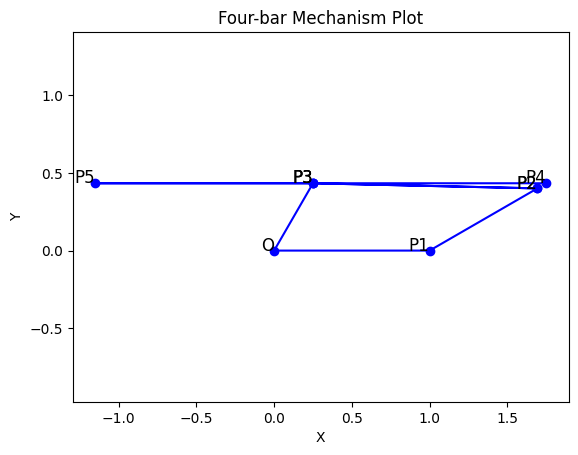

In [17]:
plot_fourbarv2(state)

In [18]:
### Constraints

zero_vec = p2 - p4
zero_vec.simplify()

zero = []
zero.append(zero_vec.T * sympy.Matrix([1,0,0]))
zero.append(zero_vec.T * sympy.Matrix([0,1,0]))


In [19]:
zero = sympy.Matrix(zero)
zero.simplify()
zero

Matrix([
[l_1 + l_2*cos(\theta_2) - l_3*cos(\theta_1) - l_4*cos(\theta_1 + \theta_3)],
[      l_2*sin(\theta_2) - l_3*sin(\theta_1) - l_4*sin(\theta_1 + \theta_3)]])

In [20]:
zero_design = zero.subs(design)
zero_design

Matrix([
[-0.5*cos(\theta_1) + 0.8*cos(\theta_2) - 1.5*cos(\theta_1 + \theta_3) + 1],
[    -0.5*sin(\theta_1) + 0.8*sin(\theta_2) - 1.5*sin(\theta_1 + \theta_3)]])

In [21]:
ini = numpy.array([110, 160, 250])*pi/180
ini = numpy.array(ini , dtype = float)
ini

array([1.91986218, 2.7925268 , 4.36332313])

In [22]:
state = {}
state[q1] = 60 * pi/180
state[q2] = 30 * pi/180
state[q3] = 290 * pi/180


In [23]:
def objective_function(variables):
   
    q1n, q2n, q3n = variables

    state = {}
    state[q1] = q1n
    state[q2] = q2n
    state[q3] = q3n
    

    zero_n = zero_design.subs(state)
    zero_n.evalf()
    sos = ((zero_n.T*zero_n)[0])**0.5
    #print(sos)
    return float(sos)


In [24]:
 objective_function(ini)

1.0984142830538304

In [25]:
result = so.minimize(objective_function,x0 = ini,method = "powell")
result.x

array([2.44240853, 1.52155909, 4.16456038])

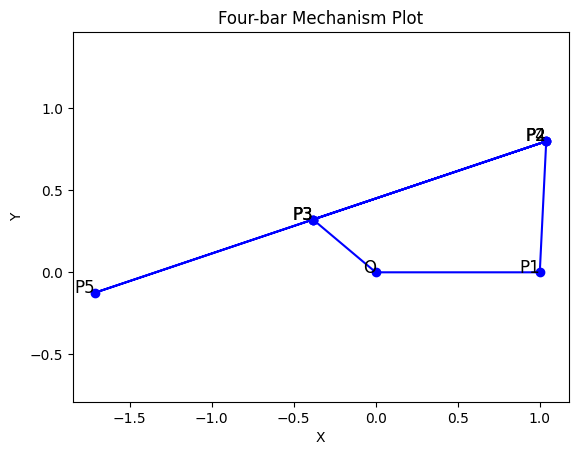

In [26]:
plot_fourbarv2(result.x)

In [27]:
q1_test = numpy.arange(10,170, step = 40 )
q2_test = numpy.arange(110,190, step = 20 )
q3_test = numpy.arange(350,190, step = -40)


In [28]:
q_test = numpy.column_stack((q1_test, q2_test, q3_test))
q_test = q_test * (math.pi / 180)
q_test[0]

array([0.17453293, 1.91986218, 6.10865238])

In [29]:
obj_before = []
result_opt = []

In [30]:
for i in range(len(q1_test)):
    sos = objective_function(q_test[i])
    obj_before.append(sos)
    result = so.minimize(objective_function,x0 = q_test[i] ,method = "powell")
    result_opt.append(result.x)
    print(result.x)
    # print(i)


[1.10161954 0.44362019 5.11311181]
[1.70711744 1.01723214 4.69982594]
[2.23040637 1.39312582 4.31738309]
[2.52014324 1.56514028 4.10916518]


In [31]:
result_opt

[array([1.10161954, 0.44362019, 5.11311181]),
 array([1.70711744, 1.01723214, 4.69982594]),
 array([2.23040637, 1.39312582, 4.31738309]),
 array([2.52014324, 1.56514028, 4.10916518])]

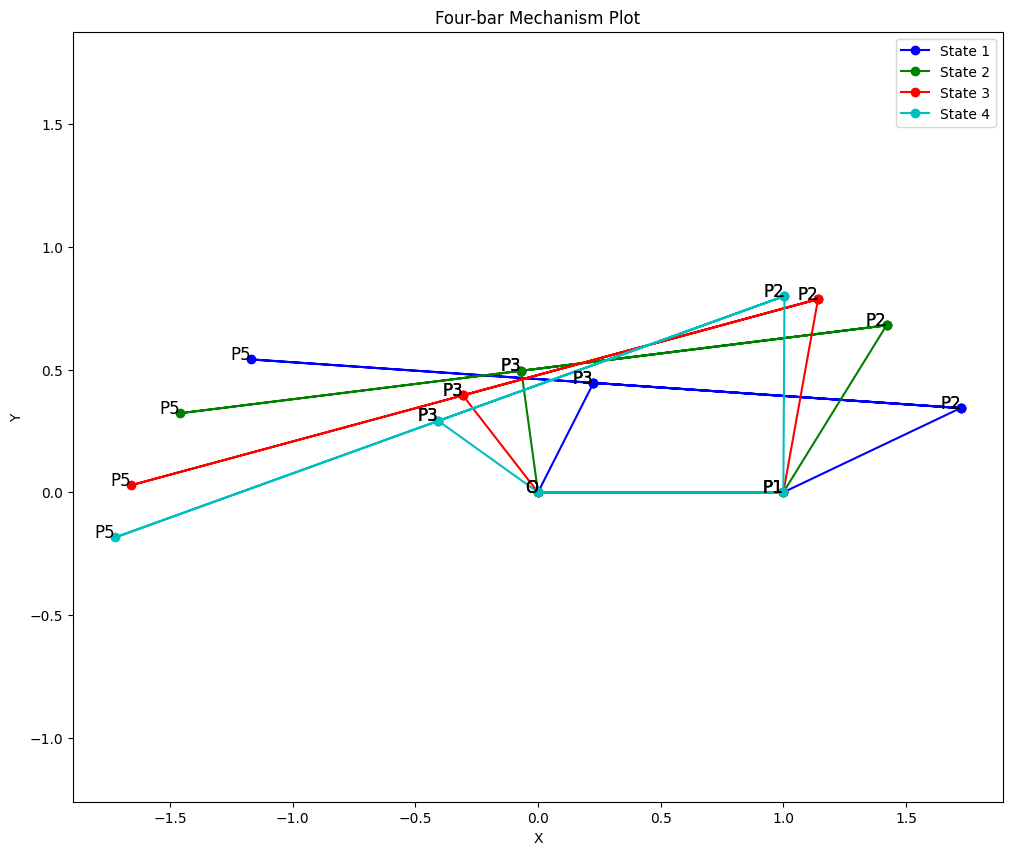

In [32]:

# Function to plot the four-bar mechanism
def plot_fourbarv2(result_opt):
    # Define a list of colors to cycle through
    colors = ['b', 'g', 'r', 'c', 'm', 'y']  # List of colors (you can add more if needed)
    
    # Initialize the plot
    plt.figure(figsize=(12, 10))
    
    # Iterate over the result_opt list and plot each point with a different color
    for i, (state, color) in enumerate(zip(result_opt, colors)):
        # Convert state to a dictionary
        state_dict = dict(zip([q1, q2, q3], state))  # Assuming q1, q2, q3 are defined somewhere
        points_state = points_design.subs(state_dict)  # Assuming points_design is defined
        points_state = numpy.array(points_state, dtype=float)

        # Plot the points for each state with a different color
        plt.plot(points_state[:, 0], points_state[:, 1], color + 'o-', label=f'State {i + 1}')
        
        # Define the labels for each point (same as before or adjusted as needed)
        labels = ['P2', 'P3', 'P5', 'P3', 'O', 'P1', 'P2', 'P3', '.']
        
        # Annotate each point with its label
        for j, label in enumerate(labels):
            plt.text(points_state[j, 0], points_state[j, 1], label, fontsize=12, ha='right')
    
    # Customize the plot
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Four-bar Mechanism Plot')
    plt.axis('equal')  # Keep the aspect ratio equal for better visualization
    plt.legend()  # Display a legend for different states
    plt.show()

plot_fourbarv2(result_opt)


In [33]:
result_opt = numpy.array(result_opt, dtype = float )

result_opt_deg = result_opt * (180/math.pi)
result_opt_deg.shape

(4, 3)

In [34]:
df = pd.DataFrame(result_opt_deg, columns=['q1', 'q2', 'q3'], index=['state1', 'state2', 'state3', 'state4'])
df

,q1,q2,q3
state1,63.118150,25.417565,292.959727
state2,97.810624,58.283108,269.280191
state3,127.792871,79.820230,247.367830
state4,144.393572,89.675932,235.437822


### Jacobian

In [35]:
p5

Matrix([
[l_3*cos(\theta_1) - l_5*sin(\theta_1)*sin(\theta_3 + 3.14159265358979) + l_5*cos(\theta_1)*cos(\theta_3 + 3.14159265358979)],
[l_3*sin(\theta_1) + l_5*sin(\theta_1)*cos(\theta_3 + 3.14159265358979) + l_5*sin(\theta_3 + 3.14159265358979)*cos(\theta_1)],
[                                                                                                                          0]])

In [36]:
J = p5.jacobian(sympy.Matrix([q1,q2,q3]))
J

Matrix([
[-l_3*sin(\theta_1) - l_5*sin(\theta_1)*cos(\theta_3 + 3.14159265358979) - l_5*sin(\theta_3 + 3.14159265358979)*cos(\theta_1), 0, -l_5*sin(\theta_1)*cos(\theta_3 + 3.14159265358979) - l_5*sin(\theta_3 + 3.14159265358979)*cos(\theta_1)],
[ l_3*cos(\theta_1) - l_5*sin(\theta_1)*sin(\theta_3 + 3.14159265358979) + l_5*cos(\theta_1)*cos(\theta_3 + 3.14159265358979), 0, -l_5*sin(\theta_1)*sin(\theta_3 + 3.14159265358979) + l_5*cos(\theta_1)*cos(\theta_3 + 3.14159265358979)],
[                                                                                                                           0, 0,                                                                                                        0]])

In [37]:
# Jacobian at state 1
df.loc['state1', 'q1']

Jn = J.subs({q1: df.loc['state1', 'q1'] , q2: df.loc['state1', 'q2'], q3:df.loc['state1', 'q3'] }).subs(design)
Jn

Matrix([
[-1.37455808400913, 0, -1.23335709224256],
[ 1.14209074319107, 0, 0.662442663945319],
[                0, 0,                 0]])

In [38]:
# Normal force  = 2g * 9.81 = -0.01962
# Kinetic friction = 0.4 * 0.01962 = -0.007848

F = sympy.Matrix([-0.007848, 0, -0.01962])
F

Matrix([
[-0.007848],
[        0],
[ -0.01962]])

We know that $\tau$ = $J^{T}F$

In [39]:
t = symbols('\\tau')
# Jn.T
t = (Jn.T)*F
t

Matrix([
[ 0.0107875318433036],
[                  0],
[0.00967938645991963]])